In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

<IPython.core.display.HTML object>

In [0]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Downloading nltk-3.5.zip (1.4 MB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.7/site-packages (from nltk) (0.14.1)
Collecting click
 Downloading click-7.1.2-py2.py3-none-any.whl (82 kB)
Collecting regex
 Downloading regex-2020.11.13-cp37-cp37m-manylinux2014_x86_64.whl (719 kB)
Collecting tqdm
 Downloading tqdm-4.55.0-py2.py3-none-any.whl (68 kB)
Building wheels for collected packages: nltk
 Building wheel for nltk (setup.py): started
 Building wheel for nltk (setup.py): finished with status 'done'
 Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=3c77c49f67a905dc3e3b756247d597e9fedfe71757cd090ee4b6d5dd2a985acf
 Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
Installing collected packages: tqdm, regex, click, nltk
Successfully installed click-7.1.2 nltk-3.5 regex-2020.11.13 tqdm-4.55.0
Python interpreter will be restarted.

In [0]:
%%time

# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#Dependency: pip install tqdm
from tqdm import tqdm_notebook as tqdm

from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.
CPU times: user 684 ms, sys: 131 ms, total: 815 ms
Wall time: 972 ms

In [0]:
%%time

# col_names = ['review_id', 'business_id', 'user_id', 'text', 'stars', 'text length']

reviews_dataset = pd.read_csv('https://raw.githubusercontent.com/SivaSaiRam143/BDA_PROJECT/main/shortened.csv')
#display(reviews_dataset.head(3))
df=reviews_dataset[['review_id', 'business_id', 'user_id', 'text', 'stars']]
#df.head()
reviews_dataset=df
reviews_dataset.head()

CPU times: user 296 ms, sys: 120 ms, total: 415 ms
Wall time: 1.8 s
Out[3]:

,review_id,business_id,user_id,text,stars
0,fWKvX83p0-ka4JS3dc6E5A,9yKzy9PApeiPPOUJEtnvkg,rLtl8ZkDX5vH5nAx9C3q5Q,My wife took me here on my birthday for breakf...,5
1,IjZ33sJrzXqU-0X6U8NwyA,ZRJwVLyzEJq1VAihDhYiow,0a2KyEL0d3Yb1V6aivbIuQ,I have no idea why some people give bad review...,5
2,IESLBzqUCLdSzSqm0eCSxQ,6oRAC4uyJCsJl1X0WZpVSA,0hT2KtfLiobPvh6cDC8JQg,love the gyro plate. Rice is so good and I als...,4
3,G-WvGaISbqqaMHlNnByodA,_1QQZuf4zZOyFCvXc0o6Vg,uZetl9T0NcROGOyFfughhg,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,1uJFq2r5QfJG_6ExMRCaGw,6ozycU1RpktNG2-1BroVtw,vYmM4KTsC8ZfQBg-j5MWkw,General Manager Scott Petello is a good egg!!!...,5


In [0]:
# reviews_dataset.shape[0] - gives number of row count
reviews_dataset = reviews_dataset[reviews_dataset['text'].notna()]
reviews_dataset = reviews_dataset[reviews_dataset['stars'].notna()]
reviews_dataset=reviews_dataset.head(25000)
print("Total No. of Reviews: {}".format(reviews_dataset.shape[0]))

Total No. of Reviews: 24999

In [0]:
import string
def get_clean_text(sample_review):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    text = sample_review
    #display(text)
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(sample_review)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    #display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    clean_text = ""
    for word in l:
        clean_text += str(word)+" "
    
    return clean_text.strip()

In [0]:
# TEST 
# get_clean_text()
sample_review = reviews_dataset.text[28]
print(get_clean_text(sample_review))

breakfast yesterday years since stopped remember entire place waiter service place empty 9am tuesday morning atmosphere casual place pretty much long remember one 2 people native phoenix always felt pricey think inflation caught since prices seemed normal went yesterday loved chips salsa hot sauce fantastic great spicy kick went recommendation chile relleno isnt favorite like going waiters say gave try great flavorful put eggs eat together tortillas fresh homemade tasting hash browns beans good read newspaper drank soda enjoyed whole place myselfoh yeah read yelp reviews bookmarked next stop ha ha

In [0]:
import string
def get_words(text):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(sample_review)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    print(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    print(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    
    return l, len(l)

In [0]:
for i in range(1):
    sample_review = str(reviews_dataset.text[i])
    #display(sample_review)
    check = get_words(sample_review)
    print(check[0]) # a tuple

wife took me here on my birthday for breakfast and it was excellent. the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. our waitress was excellent and our food arrived quickly on the semi-busy saturday morning. it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary. it was phenomenal and simply the best i've ever had. i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. it was the best "toast" i've ever had.

anyway, i can't wait to go back
 wife took me here on my birthday for breakfast and it was excellent the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure our waitress was excellent and our food arrived quickly on the semibusy saturday morning it looked like the place fills up pretty quickly so the earlier you get here the better

do yourself a favor and get their bloody mary it was phenomenal and simply the best ive ever had im pretty sure they only use ingredients from their garden and blend them fresh when you order it it was amazing

while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete it was the best toast ive ever had

anyway i cant wait to go back
['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'bloody', 'mary', 'phenomenal', 'simply', 'best', 'ever', 'im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'everything', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'ever', 'anyway', 'cant', 'wait', 'go', 'back']

In [0]:
pd.set_option('display.precision', 2)
reviews_dataset.describe()

Out[19]:

,stars
count,24999.00
mean,3.78
std,1.22
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,5.00


In [0]:
reviews_dataset["stars"].value_counts()
type(reviews_dataset["stars"].value_counts())

Out[20]: pandas.core.series.Series

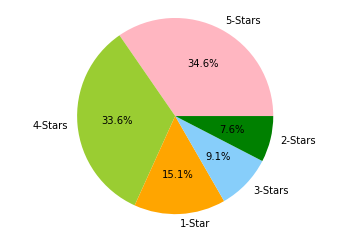

In [0]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
 
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%') 
plt.axis('equal')
plt.show()

In [0]:
%%time
# we're interested in the text of each review 
# and the stars rating, so we load these into 
# separate lists
import pickle
texts = []
stars = [reviews_dataset['stars'] for review in reviews_dataset]
#pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(get_clean_text(row['text']))
    #pbar.update(1)
#pbar.close()

CPU times: user 17.9 s, sys: 792 ms, total: 18.7 s
Wall time: 18.7 s

In [0]:
%%time
# Estimated time: 11 mins--for all the data
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)

CPU times: user 16.3 s, sys: 781 ms, total: 17.1 s
Wall time: 17.1 s

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.30, random_state=42, shuffle =False)

In [0]:
%%time
# Estimated time: 12.6 s
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

CPU times: user 4.42 s, sys: 168 ms, total: 4.59 s
Wall time: 4.6 s
Out[29]: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
 intercept_scaling=1, loss='squared_hinge', max_iter=1000,
 multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
 verbose=0)

In [0]:
preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
print(y_test[:5])
print("Predicted Ratings: ",end = "")
print(preds[:5])

Actual Ratings(Stars): 17499 4
17500 5
17501 1
17502 2
17503 4
Name: stars, dtype: int64
Predicted Ratings: [4 5 1 4 4]

In [0]:
X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=1, random_state=42, shuffle = False)
predict_all = classifier.predict(vectors)

In [0]:
predicted_stars = list(predict_all)

print("Actual Ratings(Stars): ")
print(vectors[15470:15476])
print("\nPredicted Ratings: ",end = "")
print(predicted_stars[15470:15476])

Actual Ratings(Stars): 
 (0, 1533826)	0.09458185574787141
 (0, 1576815)	0.09458185574787141
 (0, 1504893)	0.09458185574787141
 (0, 1927479)	0.09458185574787141
 (0, 1910431)	0.09090622422844437
 (0, 1501200)	0.09458185574787141
 (0, 1509779)	0.09458185574787141
 (0, 2003690)	0.09458185574787141
 (0, 1049536)	0.09458185574787141
 (0, 2476262)	0.09458185574787141
 (0, 1508077)	0.09458185574787141
 (0, 1881632)	0.09458185574787141
 (0, 337279)	0.09458185574787141
 (0, 660635)	0.09458185574787141
 (0, 507376)	0.09458185574787141
 (0, 766448)	0.09458185574787141
 (0, 1391659)	0.09458185574787141
 (0, 2245247)	0.09458185574787141
 (0, 1126471)	0.09458185574787141
 (0, 2015139)	0.09458185574787141
 (0, 797768)	0.09458185574787141
 (0, 331013)	0.09458185574787141
 (0, 799868)	0.09458185574787141
 (0, 1456829)	0.09458185574787141
 (0, 1678049)	0.09458185574787141
 :	:
 (5, 621052)	0.019147315483113887
 (5, 2433368)	0.03084488312655267
 (5, 132389)	0.021275485814748286
 (5, 1922520)	0.02485132071449805
 (5, 1160261)	0.03240104791182535
 (5, 689576)	0.08968114948476805
 (5, 1871645)	0.03379948418833897
 (5, 76924)	0.07623533594252864
 (5, 2357211)	0.022894520243412615
 (5, 600503)	0.01389128931891005
 (5, 1134726)	0.02409376678278801
 (5, 2349277)	0.04771457981034307
 (5, 1990663)	0.04092247870521741
 (5, 930761)	0.009995814788518053
 (5, 1889689)	0.0544866803340075
 (5, 825786)	0.02986541701563555
 (5, 1312699)	0.018127996025319736
 (5, 173561)	0.03639203362127573
 (5, 913732)	0.012364613679807098
 (5, 2348559)	0.017938349810649883
 (5, 1261891)	0.02439389839830074
 (5, 885191)	0.012123390143788878
 (5, 1682505)	0.015775934124699693
 (5, 1206999)	0.011245862174302604
 (5, 808559)	0.010345975981568249

Predicted Ratings: [1, 2, 3, 5, 3, 2]

In [0]:
print("\nOriginal Reviews (with user bias)")
display(reviews_dataset.tail(10))

print("\nUnbiased Reviews (with predicted rating using user's review text)")
unbiased_reviews_dataset = reviews_dataset

# dropping actual ratings(stars) by user
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars', 1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['stars'] = predicted_stars


Original Reviews (with user bias)

review_id,business_id,user_id,text,stars
zpqIcyVxjwJ1tXXyLPaUXA,OdD1GuGNQ64ssJmMJ_D9RQ,f01B5tRtqf3k6ak1pPSAWw,Fun place! Love all the old fashioned drinks and pie!,4
Xm_tooJTCL994eHO00CpWA,c1yGkETheht_1vjda7G5sA,MfzQr1wAuA-Hj1eNHPqAgA,"wowza. this place could probably convert a Texas rancher to a vegan, the food is THAT GOOD. I started with a yummy salad- greens with balsamic, dried figs, pecans & strawberry. the ""small"" salad was a very good size. then had the apricot miso rice bowl with tons of veggie mock chicken. incredible sauce, I would have licked the bowl, had the restaraunt not been full. speaking of full, even though I WAS full at that point, I could not pass up the Soy-namis. had a Ginger Snap & damn if I did not eat all 16 glorious ounces of it... my belly is distended. it was worth it. good thing I was wearing my platform peeptoe shoes when I showed up, this place is for young hipsters. the vibe is young & cool (2 things I am not), but not in a snobby way. more grungy hip, if ya' know what I mean.",5
2POkD03rdk-Uuk4rZ16TyA,Zx8_4zKdDBSO3qGrkukBIA,uVU1FyUPPVxzZ8jbye-rFA,I haven't been to this in over 2 years (due to moving out of state) but someone mentioned it earlier today and I haven't stopped thinking about it. I recall always getting a carnitas quesadilla and jade red chicken lunch special. The black beans are OUT OF THIS WORLD. I tried many times to recreate them but have been unsuccessful every time. If you have questioned this place - stop it and go to it. Yeah it's in a dirty ass strip mall but who cares. It's worth it.,5
6HM9xEAAEp5eQK0DrLmDUw,XLqnjlLYt0_q_NG7l_BpMA,Ovpa3S8xD96dLE5eDxcxJg,"Can I give more than five stars for something? If something deserves to be rewarded with six or more stars, it is the ability to get a hot dog and a soda for $1.61, after tax. The corporation itself is commendable for quite a few reasons. They say that cashiers get paid $40k/ year plus benefits, which is nothing to shake a stick at. It takes a small amount of consumer awareness to know what you can and cannot consume in the time before that product expires. Once you can effectively guage those habits, you're off and running and ready to reap the benefits. You won't find cheaper booze in large quantities, or slices of pizza for under two bucks. The costs of membership are justified within the first month of shopping here, or atleast they were in my experience. I strongly recommend dropping by on weekends and sampling some of their newest goodies at one of the many free sample stands.",5
Zwit3ghhELBbOzkkyYNP_g,5hfQ5cNFDFPhcjx2De9-qQ,SNH5L8QZ4kT9unURQUrYow,"Come for their curry and their soup! I suggest getting their Panang curry -- they use fresh bell peppers, add red pepper flakes, and a decent amount of oil. I only wanted to eat half today during lunch, but I ended up devouring the entire dish. It was delicious, however, I remember my first time being much better. I asked for spiciness 4 out of 5. Including tax and tip it was about $10 which was average. During my first visit, I ate the Panang Curry, had their spicy soup, Thai iced tea, and and their sticky mango rice! MmmMM goood! There were four of us and it came out to $20 a person during dinner. However, I would still go to Thai Chili because I think I prefer the consistency of their soup and I think they have better deals on their food items.",4
DIZpqg7WSJ-xFZdyYZltWA,2zXqFId4jYuk2K8w1KI-Qw,kGgAARL2UmvCcTRfiscjug,"Whenever I need sports equipment or supplies, Sports Authority is my first choice. I like the particular location because there's always plenty of parking. This store is well organized and kept clean. Return Factor - 100%",4
InYaOFic7LmChW1HmhWutw,rwT9wCyXNATA36yqcb4JSg,mfUs6cSN06po2GCjfLlxfg,"Lurking within this dive bar is a FANTASTIC PIZZERIA. House made sauce, pies as big as 26"" perfect for parties and wings that my family loves. they have pizza and wing specials - good prices and yummy food!",5
kJ4y9BGKiDXXT-wd7hBiDg,-KEU36ohRQb19mrbA65Y3Q,KpC10_UE

Unbiased Reviews (with predicted rating using user's review text)

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.5414666666666667

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.5381346816383683
Recall: 0.5414666666666667

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

precision recall f1-score support

 1 0.67 0.45 0.53 584
 2 0.51 0.16 0.24 685
 3 0.49 0.20 0.28 1147
 4 0.50 0.63 0.55 2561
 5 0.58 0.74 0.65 2523

 accuracy 0.54 7500
 macro avg 0.55 0.43 0.45 7500
weighted avg 0.54 0.54 0.51 7500

In [0]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 260 54 46 73 151]
 [ 85 109 122 247 122]
 [ 24 44 227 662 190]
 [ 14 7 67 1605 868]
 [ 6 1 4 652 1860]]
Normalized confusion matrix
[[4.45e-01 9.25e-02 7.88e-02 1.25e-01 2.59e-01]
 [1.24e-01 1.59e-01 1.78e-01 3.61e-01 1.78e-01]
 [2.09e-02 3.84e-02 1.98e-01 5.77e-01 1.66e-01]
 [5.47e-03 2.73e-03 2.62e-02 6.27e-01 3.39e-01]
 [2.38e-03 3.96e-04 1.59e-03 2.58e-01 7.37e-01]]

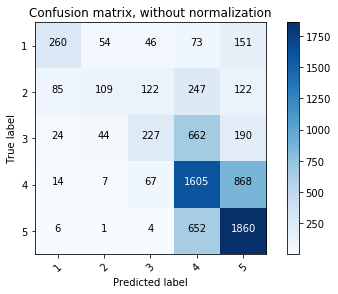

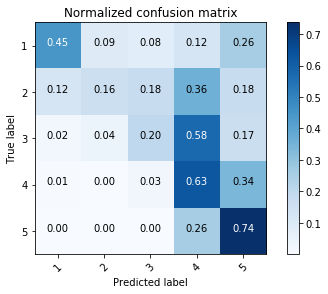

In [0]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
# making binary classes
sentiments = []
for star in stars[1]:
    if star <= 3:
        sentiments.append('n')
    if star > 3:
        sentiments.append('p')

print(len(sentiments))        
        

24999

In [0]:
%%time

X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

CPU times: user 24.5 ms, sys: 36.3 ms, total: 60.8 ms
Wall time: 62.7 ms

In [0]:
%%time

classifier2 = LinearSVC()
# train the classifier
classifier2.fit(X2_train, y2_train)

CPU times: user 993 ms, sys: 51.8 ms, total: 1.04 s
Wall time: 1.09 s
Out[53]: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
 intercept_scaling=1, loss='squared_hinge', max_iter=1000,
 multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
 verbose=0)

In [0]:
preds2 = classifier2.predict(X2_test)
print("Actual Class:    ",end = "")
print(y2_test[:10])
print("\nPredicted Class: ",end = "")
print(list(preds2[:10]))

Actual Class: ['n', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p']

Predicted Class: ['n', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p']

In [0]:
print(accuracy_score(y2_test, preds2))

0.8434

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y2_test, preds2, average='weighted')))
print ('Recall: ' + str(recall_score(y2_test, preds2, average='weighted')))

Precision: 0.8455008853754942
Recall: 0.8434

In [0]:
print(classification_report(y2_test, preds2))

precision recall f1-score support

 n 0.86 0.61 0.72 1613
 p 0.84 0.95 0.89 3387

 accuracy 0.84 5000
 macro avg 0.85 0.78 0.80 5000
weighted avg 0.85 0.84 0.84 5000

In [0]:
print(metrics.confusion_matrix(y2_test, preds2))

[[ 990 623]
 [ 160 3227]]

Confusion matrix, without normalization
[[ 990 623]
 [ 160 3227]]
Normalized confusion matrix
[[0.61 0.39]
 [0.05 0.95]]

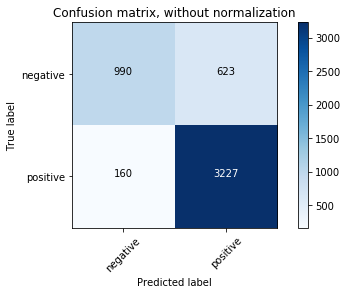

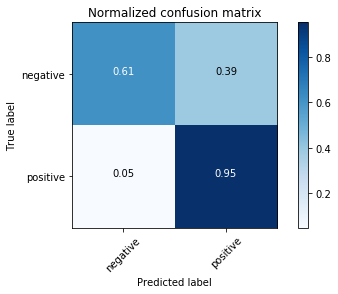

In [0]:
class_names = ['negative','positive']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y2_test, preds2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()